In [ ]:
!ls /content/dataset

'Biodegradable Images'	'Recyclable Images'  'Trash Images'


In [ ]:
!rm -r /content/dataset/Dataset

In [ ]:
!ls  /content/dataset

'Biodegradable Images'	'Recyclable Images'  'Trash Images'


In [ ]:
!unzip -q "bio recy new.zip" -d dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

In [ ]:
!ls -l /content/dataset


total 20
drwxr-xr-x 2 root root 12288 Jun 24 16:01 'Biodegradable Images'
drwxr-xr-x 2 root root  4096 Jun 24 16:01 'Recyclable Images'
drwxr-xr-x 2 root root  4096 Jun 24 16:01 'Trash Images'


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 312 images belonging to 3 classes.
Found 78 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')   # 3 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',   # ✅ for one-hot labels
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.3277 - loss: 2.7220 - val_accuracy: 0.3333 - val_loss: 1.0077
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4534 - loss: 0.9063 - val_accuracy: 0.5641 - val_loss: 0.9975
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6838 - loss: 0.6461 - val_accuracy: 0.5897 - val_loss: 1.2889
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7576 - loss: 0.5037 - val_accuracy: 0.5641 - val_loss: 1.4366
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8384 - loss: 0.3385 - val_accuracy: 0.3974 - val_loss: 2.2027
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8909 - loss: 0.2391 - val_accuracy: 0.4231 - val_loss: 4.5032
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8744 - loss: 0.2745 - val_accuracy: 0.4615 - val_loss: 3.1200
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9348 - loss: 0.1659 - val_accuracy: 0.3974 - val_loss: 2.9087
Epo

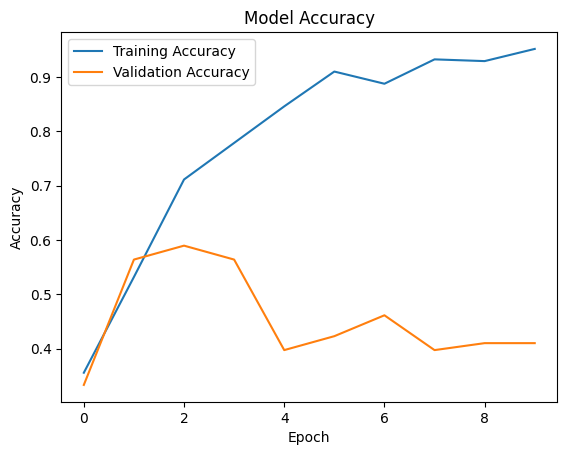

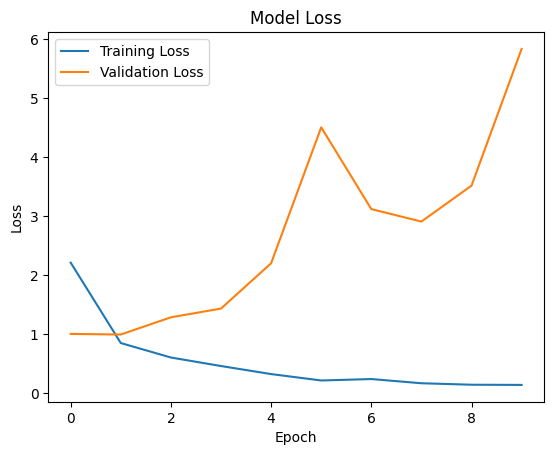

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - accuracy: 0.4200 - loss: 5.6411
Validation Accuracy: 0.41


In [ ]:
model.save("waste_classifier_model.h5")

In [ ]:
from google.colab import files
files.download("waste_classifier_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>